# How to pass class names to ConfusionMatrix

This is a follow up to issue [#244](https://github.com/DistrictDataLabs/yellowbrick/issues/244) and PR [#253](https://github.com/DistrictDataLabs/yellowbrick/pull/253), to document how to pass class names to `ConfusionMatrix`

In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts

from yellowbrick.classifier import ConfusionMatrix

In [2]:
iris = load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)

In [3]:
## target names are a list of strings corresponding to the classes
classes = iris.target_names
classes

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
model = LogisticRegression()

cm = ConfusionMatrix(model, classes=classes)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:258: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if np.all([l not in y_true for l in labels]):


ValueError: At least one label specified must be in y_true

:(

Workaround:

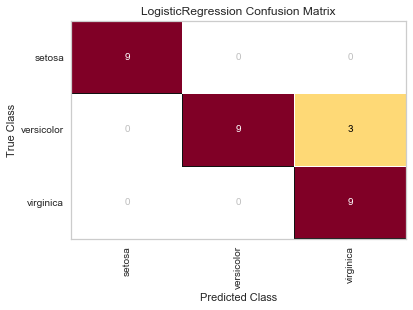

In [5]:
cm = ConfusionMatrix(
    model, classes=classes, 
    label_encoder={0: 'setosa', 1: 'versicolor', 2: 'virginica'}
)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()